In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load DATA SET

In [2]:
DATA_IN_PATH = './data_set/'

In [3]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')

In [4]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# TRAIN DATA EDA

In [5]:
print('파일 크기 : ')
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
sample_submission.csv         24.69MB
test.csv                      481.16MB
train.csv                     63.4MB


### train data set size < test data set size

In [6]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 404290


In [7]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)

In [8]:
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [9]:
print('학습 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

학습 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


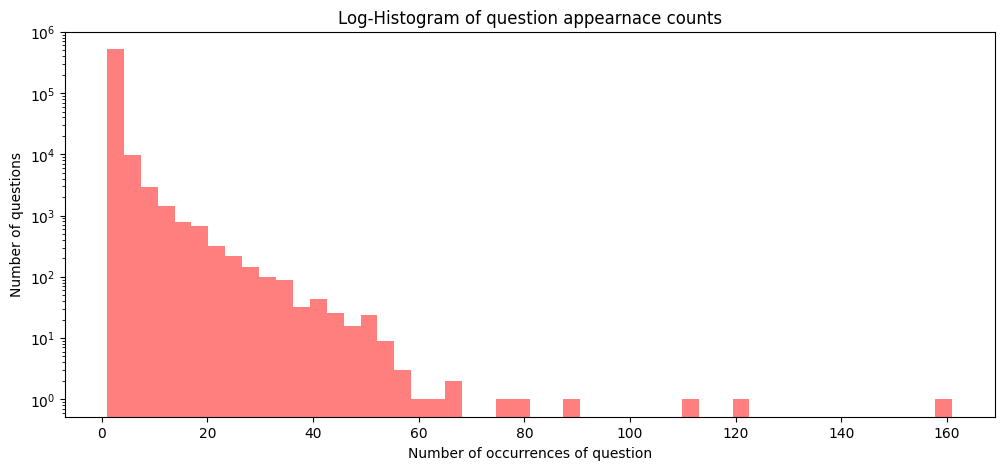

In [10]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
plt.yscale('log')
plt.title('Log-Histogram of question appearnace counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')
plt.show()

In [11]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
print('제1사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제3사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제1사분위 중복: 1.0
제3사분위 중복: 1.0


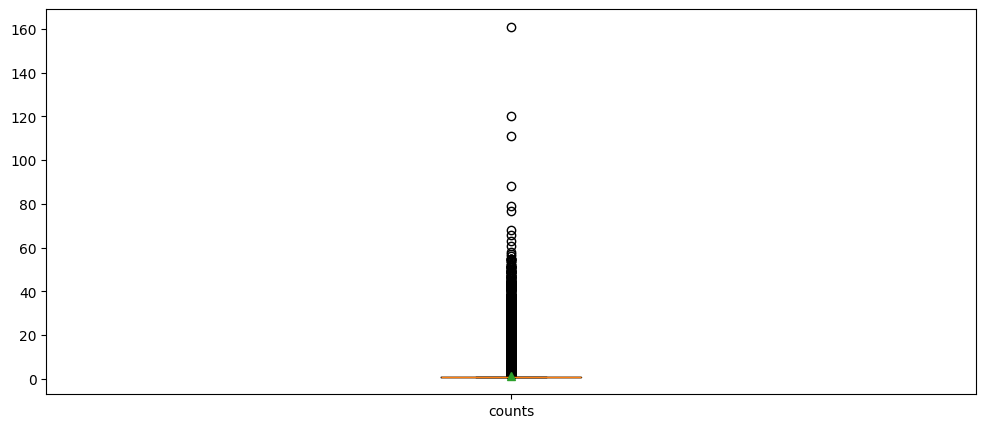

In [12]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()], tick_labels=['counts'], showmeans=True)
plt.show()

In [13]:
from wordcloud import WordCloud

In [14]:
cloud = WordCloud(width=300, height=150).generate(" ".join(train_set.astype(str)))

(-0.5, 299.5, 149.5, -0.5)

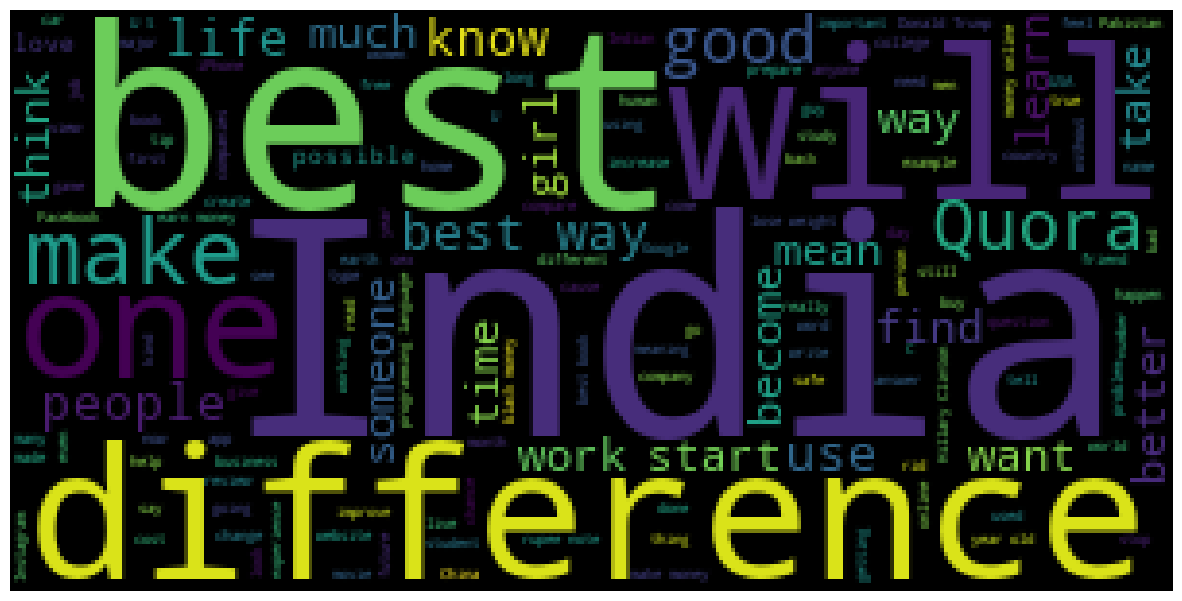

In [15]:
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

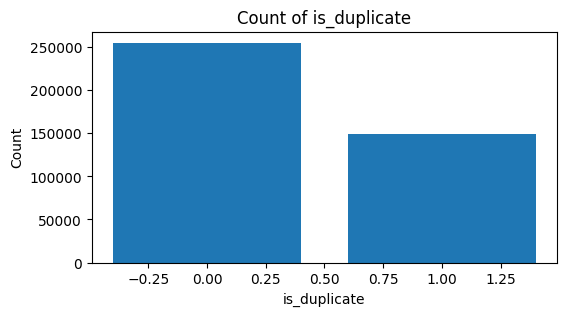

In [16]:
fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(6,3)

duplicate_counts = train_data['is_duplicate'].value_counts()

ax.bar(duplicate_counts.index, duplicate_counts.values)

ax.set_xlabel('is_duplicate')
ax.set_ylabel('Count')
ax.set_title('Count of is_duplicate')
plt.show()

In [17]:
train_length = train_set.apply(len)

In [18]:
train_length

0          66
1          51
2          73
3          50
4          76
         ... 
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64

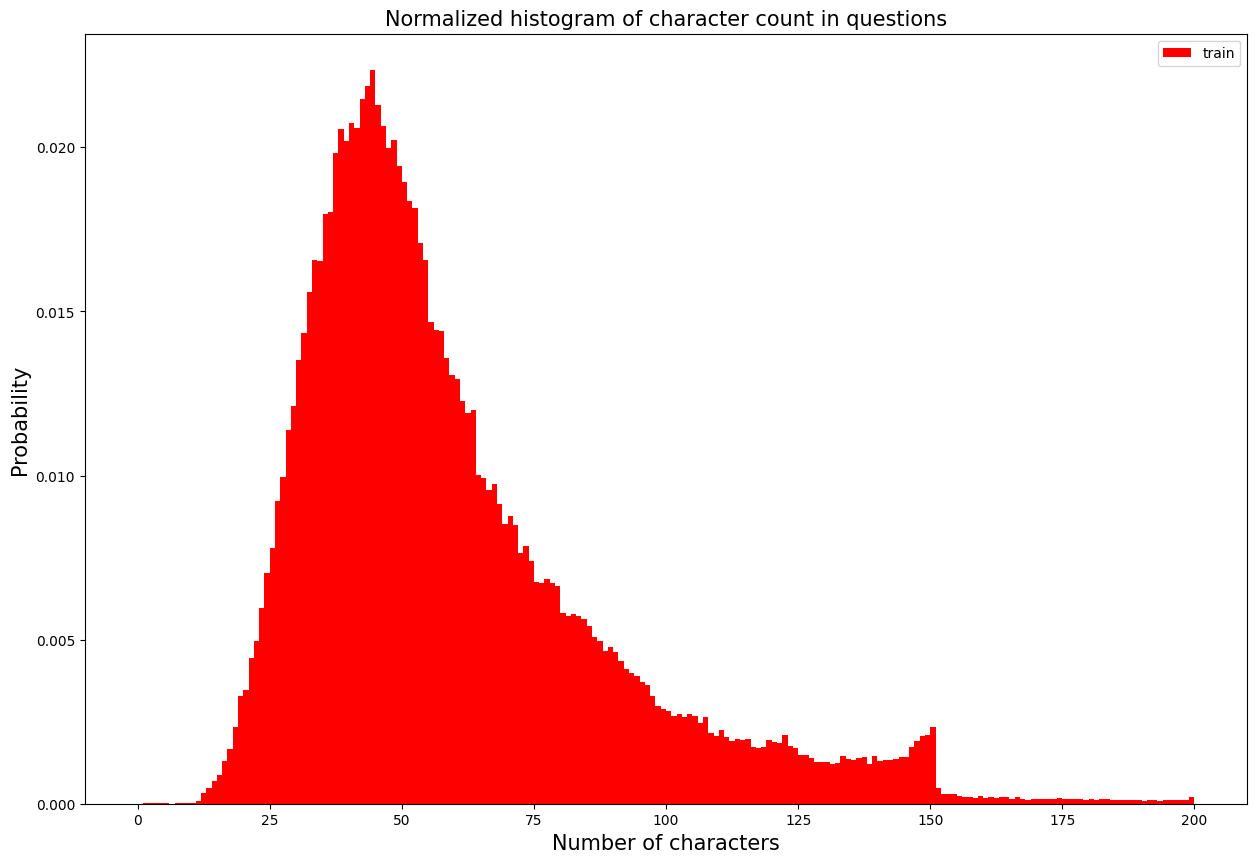

In [19]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Normalized histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

In [20]:
print('질문 길이 최댓값: {}'.format(np.max(train_length)))
print('질문 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간값: {}'.format(np.median(train_length)))
print('질문 길이 제3사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최댓값: 1169
질문 길이 평균값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간값: 51.0
질문 길이 제3사분위: 39.0
질문 길이 제3사분위: 72.0


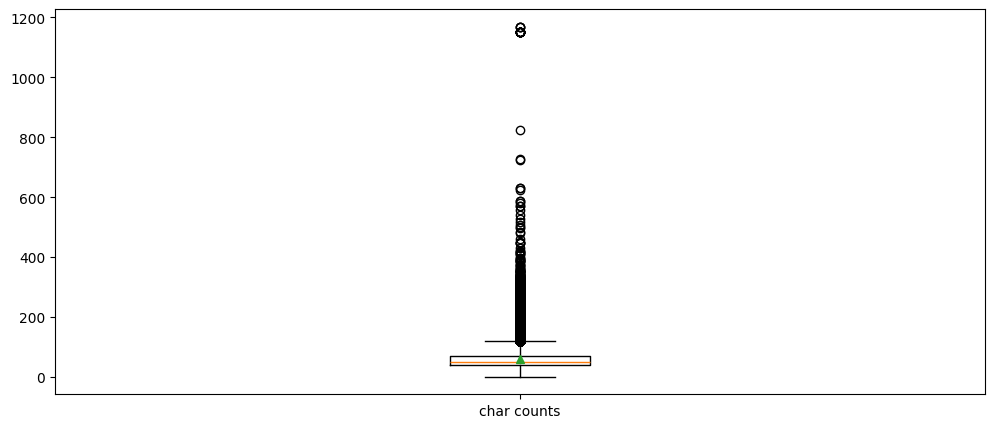

In [21]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, tick_labels=['char counts'], showmeans=True)
plt.show()

In [22]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

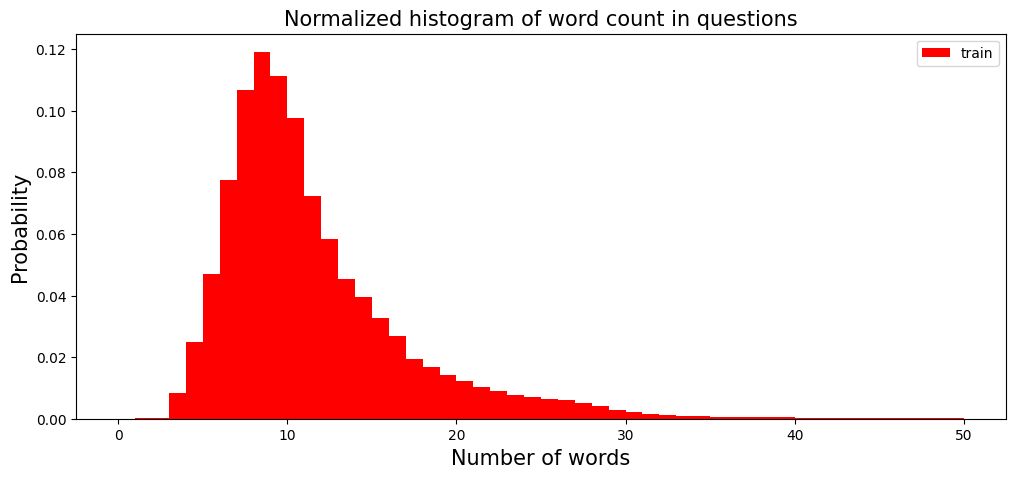

In [23]:
plt.figure(figsize=(12, 5))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalized histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

In [24]:
print('질문 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최댓값: 237
질문 단어 개수 평균값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간값: 10.0
질문 단어 개수 제3사분위: 7.0
질문 단어 개수 제3사분위: 13.0
질문 단어 개수 99퍼센트: 31.0


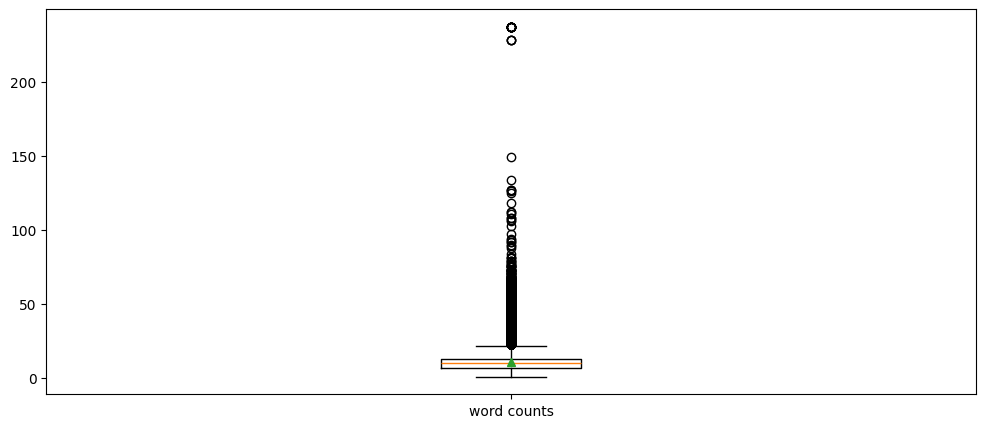

In [25]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_word_counts, tick_labels=['word counts'], showmeans=True)
plt.show()

In [26]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x))
math = np.mean(train_set.apply(lambda  x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
capital_first =np.mean(train_set.apply(lambda x:x[0].isupper()))
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x])))

In [27]:
print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가 있는 질문: {:.2f}%'.format(math * 100))
print('질문이 가득 찼을 때: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

물음표가 있는 질문: 99.87%
수학 태그가 있는 질문: 0.12%
질문이 가득 찼을 때: 6.31%
첫 글자가 대문자인 질문: 99.81%
대문자가 있는 질문: 99.95%
숫자가 있는 질문: 11.83%
